In [3]:
setwd("F:\\AQM\\Shane Cone\\CMV_QGIS Workgroup\\CMV Data Analysis - Port of Wilm")
getwd()

[1] "F:/AQM/Shane Cone/CMV_QGIS Workgroup/CMV Data Analysis - Port of Wilm"

In [116]:
#install.packages("dplyr")
#install.packages("lubridate")
#install.packages("magrittr")
install.packages("forcats")
library(dplyr)
library(lubridate)
library(tidyverse)


Installing package into 'C:/Users/Shane.Cone/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'forcats' is in use and will not be installed"

Read the file for January 2017

In [16]:
a <- read.csv("AIS_2017_01_Zone18.csv")

View details of data file. An important find here is under Draft! There are 24 million observations (records), but ~14 million draft records are NA!

In [50]:
str(a)
head(a)
summary(a)
sum(is.na(a$MMSI))
sum(is.na(a$IMO))

'data.frame':	24226749 obs. of  16 variables:
 $ MMSI        : int  367303000 367170890 338165445 316029207 338104509 366976720 367141210 367492140 367051230 367308430 ...
 $ BaseDateTime: Factor w/ 2674192 levels "2017-01-01T00:00:00",..: 6 11 21 62 65 69 72 74 77 129 ...
 $ LAT         : num  40 37.4 34.2 45.5 41.3 ...
 $ LON         : num  -75.1 -75.4 -77.8 -73.5 -72.9 ...
 $ SOG         : num  3.2 9.2 0 0 0 0 0.2 0.2 0 0 ...
 $ COG         : num  139.5 30.4 -133.6 -95.6 109.2 ...
 $ Heading     : num  127 511 511 9 354 6 511 511 511 511 ...
 $ VesselName  : Factor w/ 3334 levels "","11M0432","11MRB0435",..: 1 1 1 2299 1 1 1 1719 1 1 ...
 $ IMO         : Factor w/ 1993 levels "","IMO0000281",..: 1 1 1 427 1 1 1 1 1 1 ...
 $ CallSign    : Factor w/ 2958 levels "","1139023","2ABB2",..: 1 1 1 1 1 1 1 2121 1 1 ...
 $ VesselType  : int  NA NA NA 1025 NA NA NA 1005 NA NA ...
 $ Status      : Factor w/ 17 levels "","aground","AIS-SART (active); MOB-AIS; EPIRB-AIS",..: 7 1 1 17 17 7 17 14 1

MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>
367303000,2017-01-01T00:00:05,39.98029,-75.07053,3.2,139.5,127,,,,NA,moored,NA,NA,NA,NA
367170890,2017-01-01T00:00:10,37.40746,-75.44539,9.2,30.4,511,,,,NA,,NA,NA,NA,NA
338165445,2017-01-01T00:00:20,34.21358,-77.83226,0.0,-133.6,511,,,,NA,,NA,NA,NA,NA
316029207,2017-01-01T00:01:04,45.49996,-73.54492,0.0,-95.6,9,OCEAN CARTIER,IMO8668248,,1025,under way using engine,29.5,11.2,NA,39
338104509,2017-01-01T00:01:07,41.30553,-72.90556,0.0,109.2,354,,,,NA,under way using engine,NA,NA,NA,NA
366976720,2017-01-01T00:01:11,40.92908,-73.90550,0.0,0.1,6,,,,NA,moored,NA,NA,NA,NA


      MMSI                        BaseDateTime           LAT        
 Min.   :0.000e+00   2017-01-16T23:59:59:      78   Min.   : 5.962  
 1st Qu.:3.669e+08   2017-01-07T00:00:00:      74   1st Qu.:37.023  
 Median :3.671e+08   2017-01-25T14:31:53:      74   Median :39.717  
 Mean   :3.666e+08   2017-01-01T00:00:01:      72   Mean   :39.015  
 3rd Qu.:3.675e+08   2017-01-05T00:00:00:      69   3rd Qu.:40.660  
 Max.   :1.019e+09   2017-01-05T00:00:01:      65   Max.   :75.506  
                     (Other)            :24226317                   
      LON              SOG               COG             Heading     
 Min.   :-78.00   Min.   :-51.200   Min.   :-204.80   Min.   :  0.0  
 1st Qu.:-76.30   1st Qu.:  0.000   1st Qu.:-136.60   1st Qu.:206.0  
 Median :-75.11   Median :  0.000   Median : -49.60   Median :511.0  
 Mean   :-75.09   Mean   :  2.634   Mean   : -23.72   Mean   :363.1  
 3rd Qu.:-74.04   3rd Qu.:  4.000   3rd Qu.:  81.90   3rd Qu.:511.0  
 Max.   :-72.00   Max.   : 5

[1] 0

[1] 0

The following code looks at MMSI vs IMO. There are 3727 unique MMSI codes, and 35 of them are "0" (no NULL in field, according to above results, but there are 0's!).

For IMO#, there are 1993 unique IMO numbers, and no "NULLS" and no 0's. However, it is a factor, and includes a blank level, with, according to the table, 9,336,777 records as blank! 

Therefore, MMSI is the best/most complete identifier of ships, by far.

In [60]:
length(unique(a$MMSI))
sum(a$MMSI == 0)
length(unique(a$IMO))
sum(a$IMO == 0)
levels(a$IMO)
table(a$IMO)

[1] 3727

[1] 35

[1] 1993

[1] 0

[1] ""             "IMO0000281"   "IMO0000285"   "IMO0000286"  
   [5] "IMO0002540"   "IMO0507027"   "IMO0560225"   "IMO0566996"  
   [9] "IMO0582111"   "IMO0641114"   "IMO0955923"   "IMO1001350"  
  [13] "IMO1002017"   "IMO1002782"   "IMO1003865"   "IMO1004833"  
  [17] "IMO1006738"   "IMO1006867"   "IMO1007017"   "IMO1007419"  
  [21] "IMO1008102"   "IMO1008217"   "IMO1008774"   "IMO1009053"  
  [25] "IMO1009807"   "IMO1010129"   "IMO1011068"   "IMO1011238"  
  [29] "IMO1011800"   "IMO1011874"   "IMO1012347"   "IMO1012373"  
  [33] "IMO1012567"   "IMO1012684"   "IMO1012763"   "IMO1048576"  
  [37] "IMO1048577"   "IMO106000000" "IMO1179648"   "IMO303174162"
  [41] "IMO3123456"   "IMO5068875"   "IMO5104382"   "IMO5119246"  
  [45] "IMO5171191"   "IMO5187621"   "IMO5224053"   "IMO5264510"  
  [49] "IMO5265904"   "IMO5303897"   "IMO5355955"   "IMO5381978"  
  [53] "IMO5384360"   "IMO5427019"   "IMO6185826"   "IMO6400795"  
  [57] "IMO6402236"   "IMO6420290"   "IMO6514900"   "IMO6515667"  
  [61] "IMO6517550"   "IMO6604781"   "IMO6605278"   "IMO6621662"  
  [65] "IMO6702301"   "IMO6708472"   "IMO6709725"   "IMO6718142"  
  [69] "IMO6721981"   "IMO6727832"   "IMO6727868"   "IMO6801418"  
  [73] "IMO6801743"   "IMO6804484"   "IMO6806444"   "IMO6807010"  
  [77] "IMO6807022"   "IMO6916433"   "IMO6930233"   "IMO7000081"  
  [81] "IMO7035561"   "IMO7042813"   "IMO7042825"   "IMO7043063"  
  [85] "IMO7045970"   "IMO7046170"   "IMO7047552"   "IMO7047942"  
  [89] "IMO7048180"   "IMO7048348"   "IMO7049469"   "IMO7049732"  
  [93] "IMO7050017"   "IMO7050896"   "IMO7110000"   "IMO7114018"  
  [97] "IMO7114109"   "IMO7119551"   "IMO7119678"   "IMO7124104"  
 [101] "IMO7129465"   "IMO7202308"   "IMO7203302"   "IMO7204112"  
 [105] "IMO7205087"   "IMO7206770"   "IMO7207073"   "IMO7207748"  
 [109] "IMO7207827"   "IMO7208077"   "IMO7210496"   "IMO7223912"  
 [113] "IMO7225219"   "IMO7226897"   "IMO7227205"   "IMO7230941"  
 [117] "IMO7230965"   "IMO7234430"   "IMO7235202"   "IMO7235214"  
 [121] "IMO7303839"   "IMO7303865"   "IMO7304003"   "IMO7304015"  
 [125] "IMO7307122"   "IMO7308205"   "IMO7309443"   "IMO7310260"  
 [129] "IMO7310466"   "IMO7319010"   "IMO7319058"   "IMO7325253"  
 [133] "IMO7326350"   "IMO7333171"   "IMO7337050"   "IMO7337880"  
 [137] "IMO7338808"   "IMO7358705"   "IMO7366324"   "IMO7367031"  
 [141] "IMO7367419"   "IMO7382988"   "IMO7390478"   "IMO7390894"  
 [145] "IMO7390923"   "IMO7390935"   "IMO7390985"   "IMO7391018"  
 [149] "IMO7391020"   "IMO7393585"   "IMO7397660"   "IMO7398444"  
 [153] "IMO7400455"   "IMO7400479"   "IMO7400481"   "IMO7400510"  
 [157] "IMO7402738"   "IMO7408005"   "IMO7412109"   "IMO7417276"  
 [161] "IMO7417290"   "IMO7420405"   "IMO7420431"   "IMO7420443"  
 [165] "IMO7423079"   "IMO7432135"   "IMO7435759"   "IMO7436727"  
 [169] "IMO7437056"   "IMO7437068"   "IMO7437472"   "IMO7501077"  
 [173] "IMO7505994"   "IMO7507394"   "IMO7507411"   "IMO7510846"  
 [177] "IMO7512014"   "IMO7512026"   "IMO7512064"   "IMO7513305"  
 [181] "IMO7515767"   "IMO7517686"   "IMO7520425"   "IMO7523673"  
 [185] "IMO7525346"   "IMO7530030"   "IMO7530808"   "IMO7530810"  
 [189] "IMO7534828"   "IMO7609532"   "IMO7611389"   "IMO7612010"  
 [193] "IMO7616377"   "IMO7617151"   "IMO7626243"   "IMO7626279"  
 [197] "IMO7629104"   "IMO7629116"   "IMO7632125"   "IMO7634953"  
 [201] "IMO7638480"   "IMO7641645"   "IMO7643318"   "IMO7643502"  
 [205] "IMO7643590"   "IMO7643708"   "IMO7644661"   "IMO7644740"  
 [209] "IMO7647302"   "IMO7702762"   "IMO7702774"   "IMO7713498"  
 [213] "IMO7717676"   "IMO7720415"   "IMO7724215"   "IMO7726500"  
 [217] "IMO7726536"   "IMO7726550"   "IMO7729514"   "IMO7730288"  
 [221] "IMO7730343"   "IMO7731103"   "IMO7731294"   "IMO7732779"  
 [225] "IMO7732884"   "IMO7732896"   "IMO7733034"   "IMO7734296"  
 [229] "IMO7734430"   "IMO7736153"   "IMO7737286"   "IMO7738395"  
 [233] "IMO7738981"   "IMO7739181"   "IMO7739856"   "IMO7742451"  
 [237] "IMO7742499"   "IMO7743510"   "IMO7802562" 


               IMO0000281   IMO0000285   IMO0000286   IMO0002540   IMO0507027 
     9336777         1053        18576        14609          241        17718 
  IMO0560225   IMO0566996   IMO0582111   IMO0641114   IMO0955923   IMO1001350 
       27951        15509        13304         3434          113           26 
  IMO1002017   IMO1002782   IMO1003865   IMO1004833   IMO1006738   IMO1006867 
         160           61           96           21         7737          260 
  IMO1007017   IMO1007419   IMO1008102   IMO1008217   IMO1008774   IMO1009053 
           6          611            2          236          250           21 
  IMO1009807   IMO1010129   IMO1011068   IMO1011238   IMO1011800   IMO1011874 
          53          598           79            3          100          302 
  IMO1012347   IMO1012373   IMO1012567   IMO1012684   IMO1012763   IMO1048576 
          97          163          329           66          452          581 
  IMO1048577 IMO106000000   IMO1179648 IMO303174162

Define the data preperation function

In [18]:
data.prep <- function(data, lower, upper, left, right, NULL.A){
b <- subset(a, a$LAT >= lower & LAT <= upper & LON <= right & LON >= left)
print("Taking the absolute value of SOG...")
b$SOG <- abs(b$SOG)
print("Formatting date-time records...")
b$BaseDateTime <- ymd_hms(b$BaseDateTime)
b$Day <- day(b$BaseDateTime)
b$wDay <- wday(b$BaseDateTime)
region <<- b
print("data prep complete")
}


Conduct data prep on full dataset

In [19]:
data.prep(data = a, lower = 38.71333333, upper = 39.80638889, left = -75.77944444, right = -75.035110
, NULL.A = FALSE)
Delaware_Riv <- region
region <- NULL
Delaware_Riv$region <- "Delaware River"
write.csv(Delaware_Riv, "AIS_limited_Delaware_Riv.csv")
Delaware_Riv_Ais_full <- read.csv("AIS_limited_Delaware_Riv.csv"
)

[1] "Taking the absolute value of SOG..."
[1] "Formatting date-time records..."
[1] "data prep complete"


View geo-relevent data that you selected in the data prep step. Once again, as is seen in the summary section for draft, a significant number (about half) of the records for Draft are Null.

In [49]:
head(Delaware_Riv_Ais_full)
str(Delaware_Riv_Ais_full)
summary(Delaware_Riv_Ais_full)

X,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,Day,wDay,region
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>
46,367090620,2017-01-01 00:00:02,38.94021,-75.31777,0.0,-151.4,511,BREAKWATER,,WYH7020,1012,under way using engine,14.72,4.50,NA,50,1,1,Port_of_Wilm
50,356136000,2017-01-01 00:01:09,39.00913,-75.14641,14.8,156.2,158,MORNING CAROL,IMO9336086,3EQI7,1004,under way using engine,199.97,32.26,10,70,1,1,Port_of_Wilm
69,367012640,2017-01-01 00:00:05,39.71684,-75.51660,0.0,-90.0,511,LINDSEY,IMO8973021,WDC3699,1025,under way using engine,21.30,9.10,NA,52,1,1,Port_of_Wilm
120,367012660,2017-01-01 00:01:12,39.71675,-75.51704,0.0,-95.4,511,SALLY,IMO8973019,WDC3701,1025,under way using engine,21.30,9.10,NA,52,1,1,Port_of_Wilm
123,367012660,2017-01-01 00:02:23,39.71691,-75.51677,0.0,-98.2,511,SALLY,IMO8973019,WDC3701,1025,under way using engine,21.30,9.10,NA,52,1,1,Port_of_Wilm
134,367012660,2017-01-01 00:00:03,39.71690,-75.51682,0.0,-96.4,511,SALLY,IMO8973019,WDC3701,1025,under way using engine,21.30,9.10,NA,52,1,1,Port_of_Wilm


'data.frame':	1286083 obs. of  20 variables:
 $ X           : int  46 50 69 120 123 134 140 187 188 191 ...
 $ MMSI        : Factor w/ 418 levels "211691000","212658000",..: 199 136 183 184 184 184 184 198 136 198 ...
 $ BaseDateTime: Factor w/ 1010562 levels "2017-01-01 00:00:00",..: 3 16 6 19 40 4 59 5 4 20 ...
 $ LAT         : num  38.9 39 39.7 39.7 39.7 ...
 $ LON         : num  -75.3 -75.1 -75.5 -75.5 -75.5 ...
 $ SOG         : num  0 14.8 0 0 0 0 0 0 14.8 0 ...
 $ COG         : num  -151.4 156.2 -90 -95.4 -98.2 ...
 $ Heading     : int  511 158 511 511 511 511 511 511 158 511 ...
 $ VesselName  : Factor w/ 401 levels "","54 MARINE 1",..: 56 262 227 338 338 338 338 47 262 47 ...
 $ IMO         : Factor w/ 342 levels "","IMO6709725",..: 1 184 73 72 72 72 72 1 184 1 ...
 $ CallSign    : Factor w/ 394 levels "","2CWA7","3EDG6",..: 388 6 274 275 275 275 275 385 6 385 ...
 $ VesselType  : Factor w/ 20 levels "0","50","52",..: 14 10 20 20 20 20 20 14 10 14 ...
 $ Status      : Factor w/

       X                   MMSI                      BaseDateTime    
 Min.   :      46   367012640:  37664   2017-01-11 00:00:03:     11  
 1st Qu.: 6293038   367699890:  37022   2017-01-27 06:57:11:     10  
 Median :12645066   367518270:  36998   2017-01-05 00:00:05:      9  
 Mean   :12478710   367141190:  36848   2017-01-22 00:00:01:      9  
 3rd Qu.:18815056   367068110:  35979   2017-01-24 19:16:31:      9  
 Max.   :24226727   367100370:  35681   2017-01-19 12:50:02:      8  
                    (Other)  :1065891   (Other)            :1286027  
      LAT             LON              SOG              COG         
 Min.   :38.72   Min.   :-75.78   Min.   : 0.000   Min.   :-204.80  
 1st Qu.:38.94   1st Qu.:-75.52   1st Qu.: 0.000   1st Qu.:-129.60  
 Median :39.51   Median :-75.43   Median : 0.100   Median : -59.60  
 Mean   :39.34   Mean   :-75.37   Mean   : 3.409   Mean   : -15.01  
 3rd Qu.:39.72   3rd Qu.:-75.17   3rd Qu.: 7.200   3rd Qu.: 129.90  
 Max.   :39.81   Max.   :-

Change file data types as appropriate

In [90]:
Delaware_Riv_Ais_full$VesselType <- as.factor(Delaware_Riv_Ais_full$VesselType)
str(Delaware_Riv_Ais_full)
levels(Delaware_Riv_Ais_full$VesselType)

'data.frame':	1286083 obs. of  20 variables:
 $ X           : int  46 50 69 120 123 134 140 187 188 191 ...
 $ MMSI        : Factor w/ 418 levels "211691000","212658000",..: 199 136 183 184 184 184 184 198 136 198 ...
 $ BaseDateTime: Factor w/ 1010562 levels "2017-01-01 00:00:00",..: 3 16 6 19 40 4 59 5 4 20 ...
 $ LAT         : num  38.9 39 39.7 39.7 39.7 ...
 $ LON         : num  -75.3 -75.1 -75.5 -75.5 -75.5 ...
 $ SOG         : num  0 14.8 0 0 0 0 0 0 14.8 0 ...
 $ COG         : num  -151.4 156.2 -90 -95.4 -98.2 ...
 $ Heading     : int  511 158 511 511 511 511 511 511 158 511 ...
 $ VesselName  : Factor w/ 401 levels "","54 MARINE 1",..: 56 262 227 338 338 338 338 47 262 47 ...
 $ IMO         : Factor w/ 342 levels "","IMO6709725",..: 1 184 73 72 72 72 72 1 184 1 ...
 $ CallSign    : Factor w/ 394 levels "","2CWA7","3EDG6",..: 388 6 274 275 275 275 275 385 6 385 ...
 $ VesselType  : Factor w/ 20 levels "0","1001","1004",..: 7 3 13 13 13 13 13 7 3 7 ...
 $ Status      : Factor w/ 

[1] "0"    "1001" "1004" "1005" "1010" "1011" "1012" "1016" "1018" "1019"
[11] "1020" "1024" "1025" "50"   "52"   "70"   "71"   "79"   "80"   "90"

Read CSV of vessel type codes

In [91]:
VesselTypeCodes <- read.csv("VesselTypeCodes.csv")
VesselTypeCodes$Vessel.Code  <- as.factor(VesselTypeCodes$Vessel.Code)
str(VesselTypeCodes)
VesselTypeCodes

'data.frame':	25 obs. of  3 variables:
 $ Vessel.Group       : Factor w/ 8 levels "Cargo","Fishing",..: 2 2 1 1 4 4 4 4 4 4 ...
 $ Vessel.Code        : Factor w/ 25 levels "1001","1002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ AVIS.Vessel.Service: Factor w/ 24 levels " Commercial Fishing Vessel",..: 1 2 3 4 5 6 7 8 8 9 ...


Vessel.Group,Vessel.Code,AVIS.Vessel.Service
<fct>,<fct>,<fct>
Fishing,1001,Commercial Fishing Vessel
Fishing,1002,Fish Processing Vessel
Cargo,1003,Freight Barge
Cargo,1004,Freight Ship
Other,1005,Industrial Vessel
Other,1006,Miscellaneous Vessel
Other,1007,Mobile Offshore Drilling Unit
Other,1008,Non - Vessel
Other,1009,Non - Vessel


In [12]:
Vessel_Vector  <- as.vector(VesselTypeCodes[['AVIS.Vessel.Service']])
Vessel_Vector

[1] " Commercial Fishing Vessel"     " Fish Processing Vessel"       
 [3] " Freight Barge"                 " Freight Ship"                 
 [5] " Industrial Vessel"             " Miscellaneous Vessel"         
 [7] " Mobile Offshore Drilling Unit" " Non - Vessel"                 
 [9] " Non - Vessel"                  " Offshore Supply Vessel"       
[11] " Oil Recovery"                  " Passenger (Inspected)"        
[13] " Passenger (Uninspected)"       " Passenger Barge (Inspected)"  
[15] " Passenger Barge (Uninspected)" " Public Freight"               
[17] " Public Tankship/Barge"         " Public Vessel, Unclassified"  
[19] " Recreational"                  " Research Vessel"              
[21] " SAR Aircraft"                  " School Ship"                  
[23] " Tank Barge"                    " Tank Ship"                    
[25] " Towing Vessel"

Code below refactors the Vessel Type factor with the names of the ships. The code below is the full list typed out, but not all levels are present, so it does not execute. The code below should work. 

Original Code
"
library(plyr)
Delaware_Riv_Ais_full$VesselType  <- as.character(Delaware_Riv_Ais_full$VesselType)
revalue(Delaware_Riv_Ais_full$VesselType, c("1001"="Commercial Fishing Vessel", "1002"=" Fish Processing Vessel", 
                                 "1003"="Cargo-Freight Barge", "1004"="Cargo-Freight Ship", "1005"="Industrial Vessel", 
                                 "1006"=" Miscellaneous Vessel", "1007"=" Mobile Offshore Drilling Unit", "1008"="Non - Vessel", 
                                 "1009"="Non - Vessel", "1010"="Offshore Supply Vessel", "1011"="Oil Recovery", 
                                 "1012"="Passenger-Passenger-Inspected", "1013"="Passenger-Passenger-Uninspected", "1014"="Passenger-Passenger Barge-Inspected", 
                                 "1015"="Passenger-Passenger Barge-Uninspected", "1016"="Cargo-Public Freight", "1017"="Tanker- Public Tankship/Barge",
                                 "1018"="Public Vessel, Unclassified", "1019"="Recreational", "1020"="Research Vessel", "1021"="Military-SAR Aircraft",
                                 "1022"="School Ship", "1023"="Tug Tow- Tank Barge", "1024"="Tanker-Tank Ship", "1025"="Tug Tow-Towing Vessel"))
"

Delaware_Riv_Ais_full$VesselType  <- as.character(Delaware_Riv_Ais_full$VesselType)
"revalue(Delaware_Riv_Ais_full$VesselType, c("1001"="Commercial Fishing Vessel", 
                                 "1004"="Cargo-Freight Ship", "1005"="Industrial Vessel", 
                                 "1010"="Offshore Supply Vessel", "1011"="Oil Recovery", 
                                 "1012"="Passenger-Passenger-Inspected", "1016"="Cargo-Public Freight", 
                                 "1018"="Public Vessel, Unclassified", "1019"="Recreational", "1020"="Research Vessel", 
                                 "1024"="Tanker-Tank Ship", "1025"="Tug Tow-Towing Vessel"))"
                                 



The code below joins the Delaware vessel dataset and the Vessel type codes dataset, in order to name the vessel types. There was an issue with joining where some recors were lost, though. Need to figure out why. 

In [97]:
Delaware_Riv_Ais_full_joined  <- inner_join(Delaware_Riv_Ais_full, VesselTypeCodes, by =c("VesselType" = "Vessel.Code"))


Warning message:
"Column `VesselType`/`Vessel.Code` joining factors with different levels, coercing to character vector"

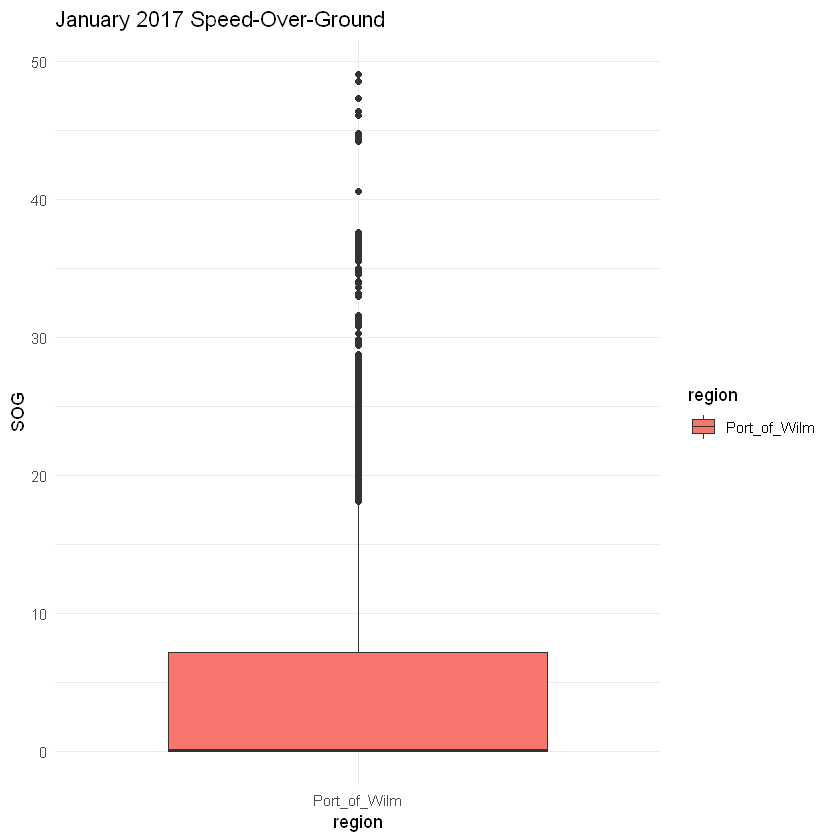

In [27]:
ggplot(Delaware_Riv_Ais_full, aes(region, SOG))+
geom_boxplot(aes(fill = region))+
ggtitle("January 2017 Speed-Over-Ground")+
theme_minimal()


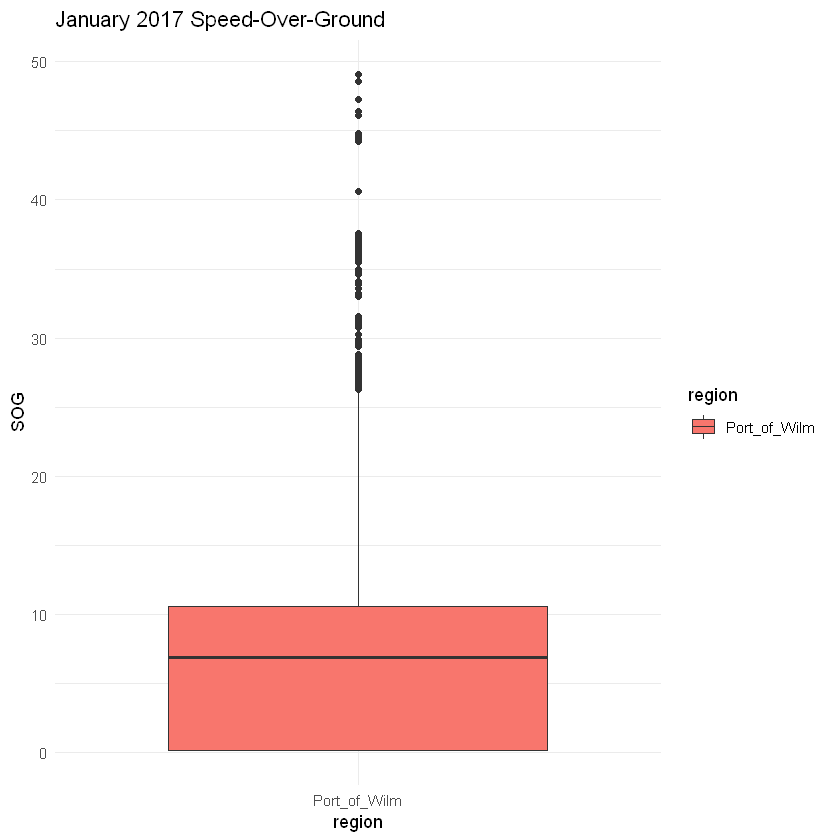

In [29]:
ggplot(data=subset(Delaware_Riv_Ais_full,SOG != 0), aes(region, SOG))+
geom_boxplot(aes(fill = region))+
ggtitle("January 2017 Speed-Over-Ground")+
theme_minimal()

Now we will look at the distribution of ships by ship type in the dataset

fct_explicit_na(AVIS.Vessel.Service),n
<fct>,<int>
Commercial Fishing Vessel,2592
Freight Ship,167183
Industrial Vessel,30267
Offshore Supply Vessel,434
Oil Recovery,13066
Passenger (Inspected),156457
Public Freight,675
"Public Vessel, Unclassified",44534
Recreational,17506


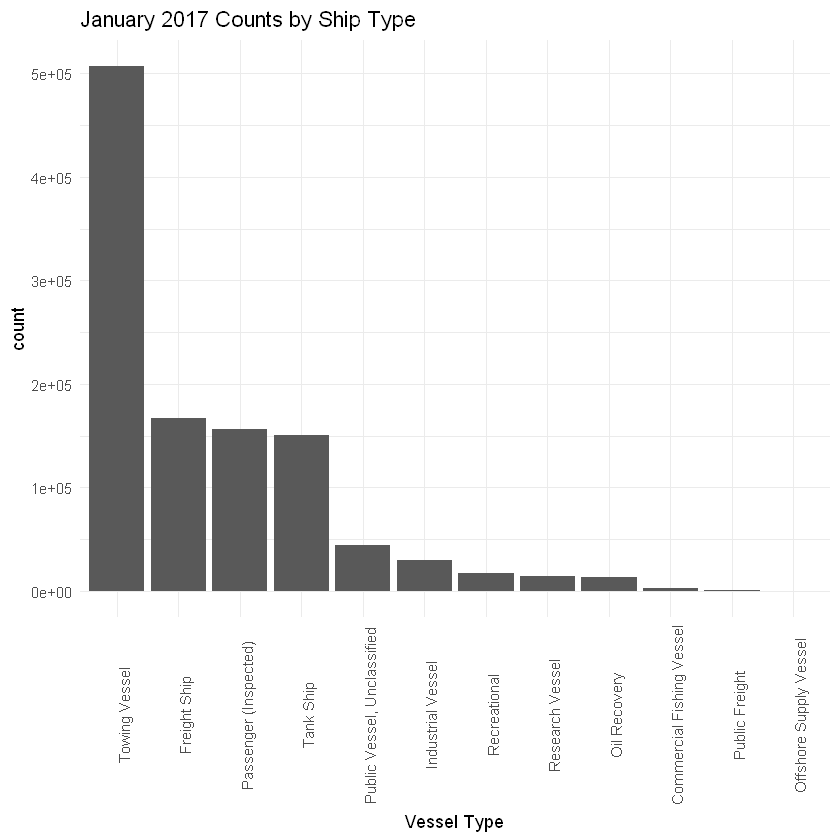

In [121]:
library(plyr)
library(forcats)
Delaware_Riv_Ais_full_joined %>% dplyr::group_by(fct_explicit_na(AVIS.Vessel.Service)) %>% dplyr::summarise(n = n())

ggplot(Delaware_Riv_Ais_full_joined)+
geom_bar(aes(x = fct_infreq(AVIS.Vessel.Service)))+
ggtitle("January 2017 Counts by Ship Type")+
theme_minimal()+
theme(axis.text.x = element_text(angle = 90))+
xlab("Vessel Type")

It looks like the vast majority of records are Towing Vessels, followed by freight ships, passenger ships, and tank ships. 

In [39]:
Delaware_Riv_Ais_full$MMSI  <- as.factor(Delaware_Riv_Ais_full$MMSI)
Delaware_Riv_Ais_full %>% group_by(fct_explicit_na(MMSI)) %>% summarize(count=n())

fct_explicit_na(MMSI),count
<fct>,<int>
211691000,420
212658000,617
218764000,536
219000034,599
219397000,1495
219671000,576
219676000,635
220216000,278
229312000,2216
